# Test 2020-02-17

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

In [18]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


No handles with labels found to put in legend.


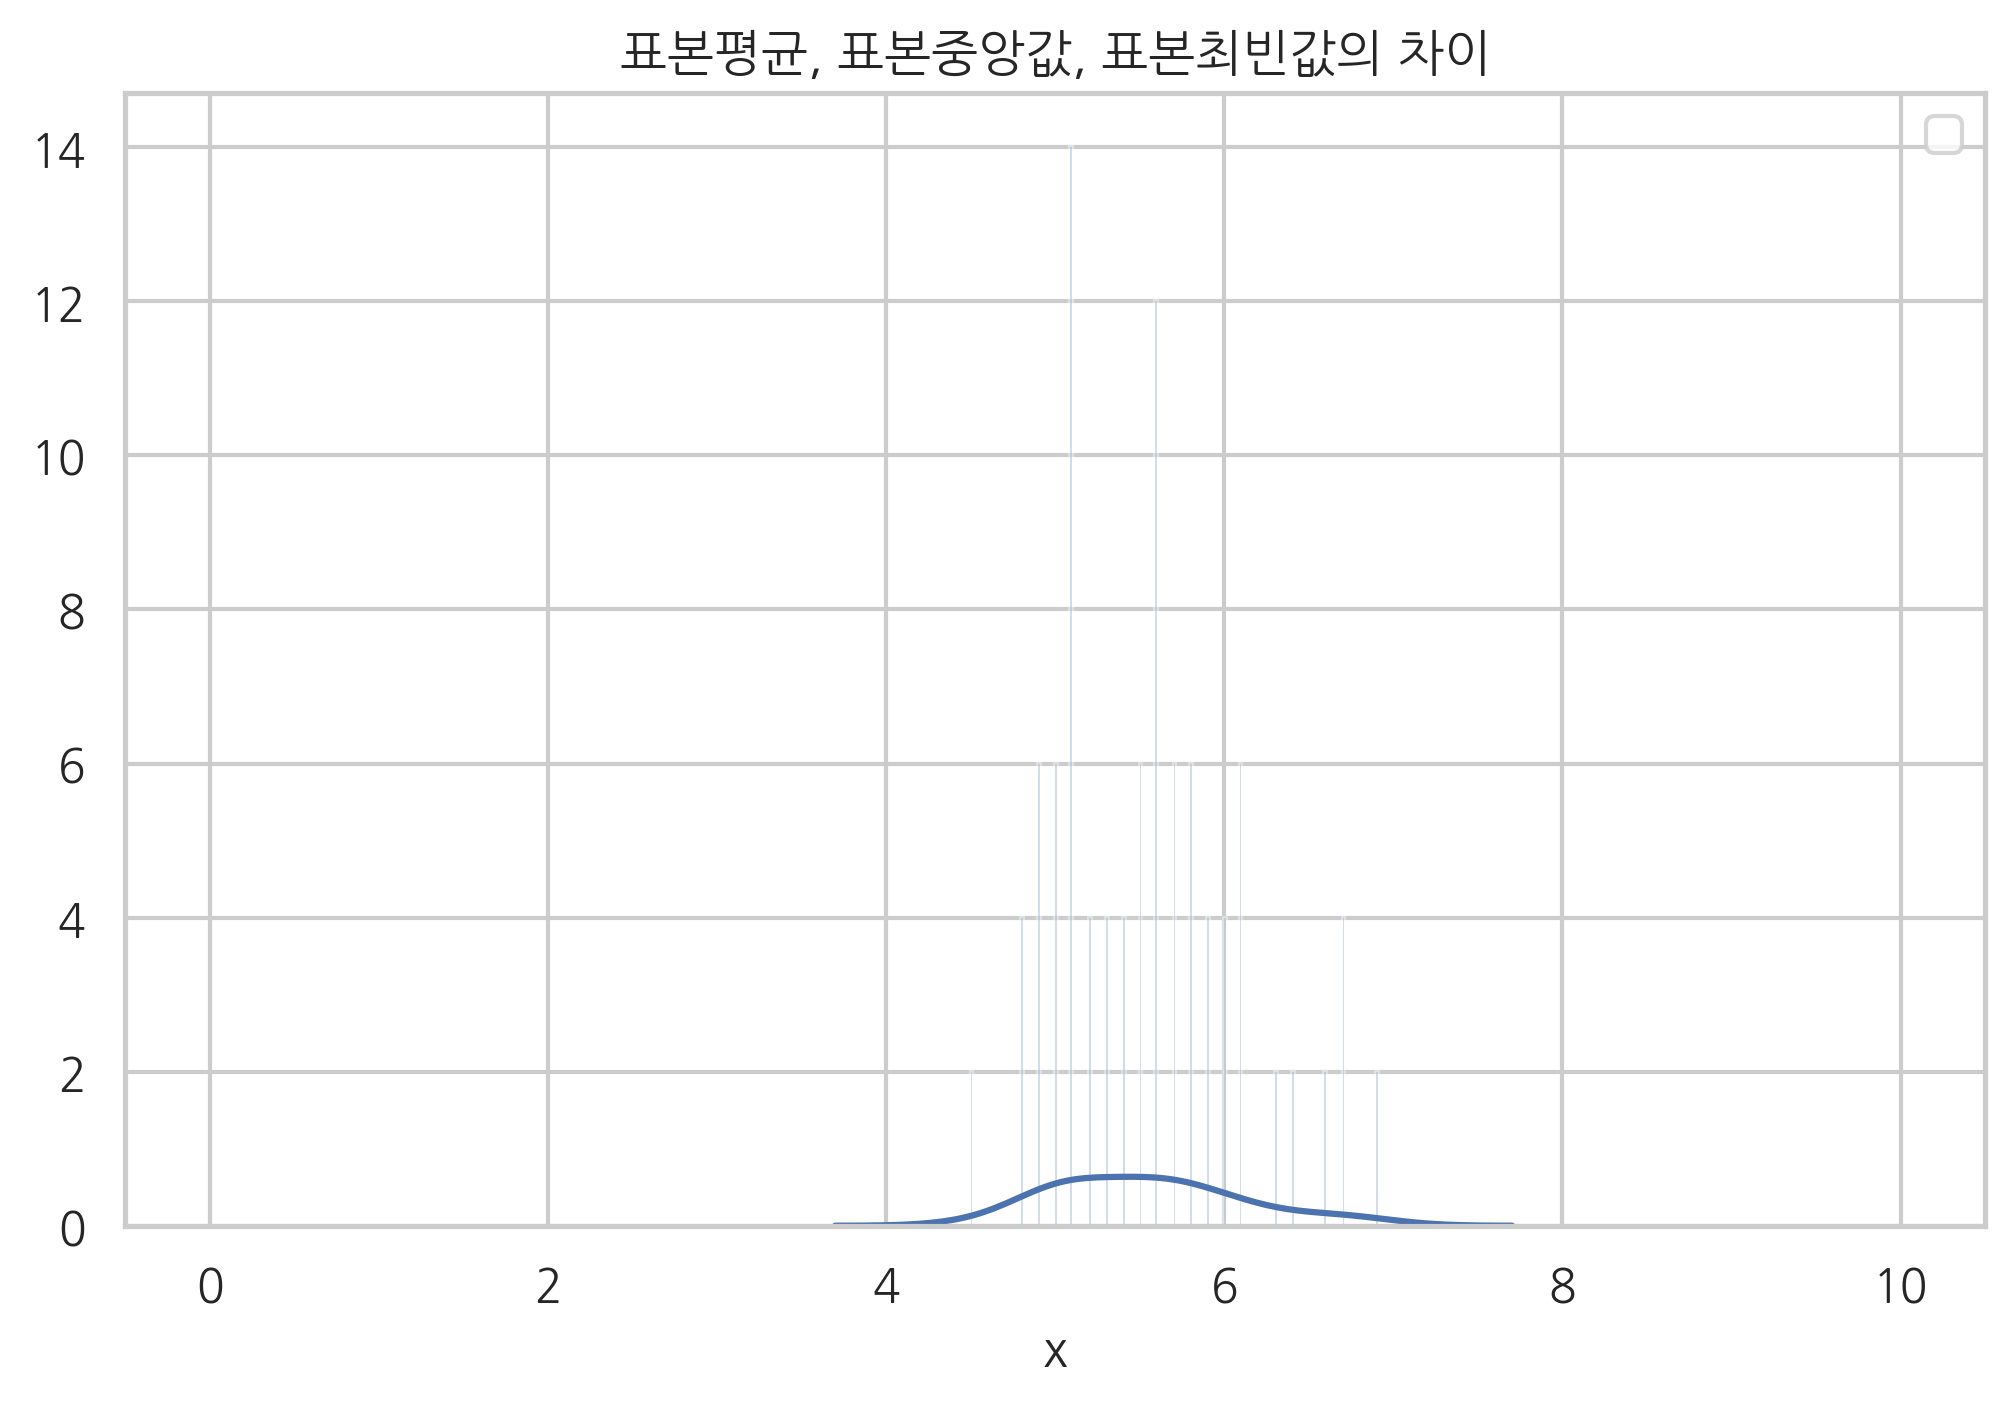

In [17]:
x = df[df.species == "virginica"]["petal length (cm)"].values

bins = np.linspace(0, 10, 1001)
ns, _ = np.histogram(x, bins=bins)

sample_mean = np.mean(x)
sample_median = np.median(x)
mode_index = np.argmax(ns)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])

sns.distplot(x, bins=bins)


plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.show()

## 기댓값과 분산

다음 표는 일간 생산량을 나타낸다. 일간 생산량의 표본 기댓값과 표본 분산, 표본 표준편차를 구하라.

(ref) Salatore p52

In [2]:
df = pd.DataFrame({"produce": [7, 8, 10, 11, 12, 14], 
                   "days": [10, 10, 20, 30, 20, 10]},
                   columns=["produce", "days"])
df

,produce,days
0,7,10
1,8,10
2,10,20
3,11,30
4,12,20
5,14,10


In [1]:
2/3/180 * 180 * 

0.0037037037037037034

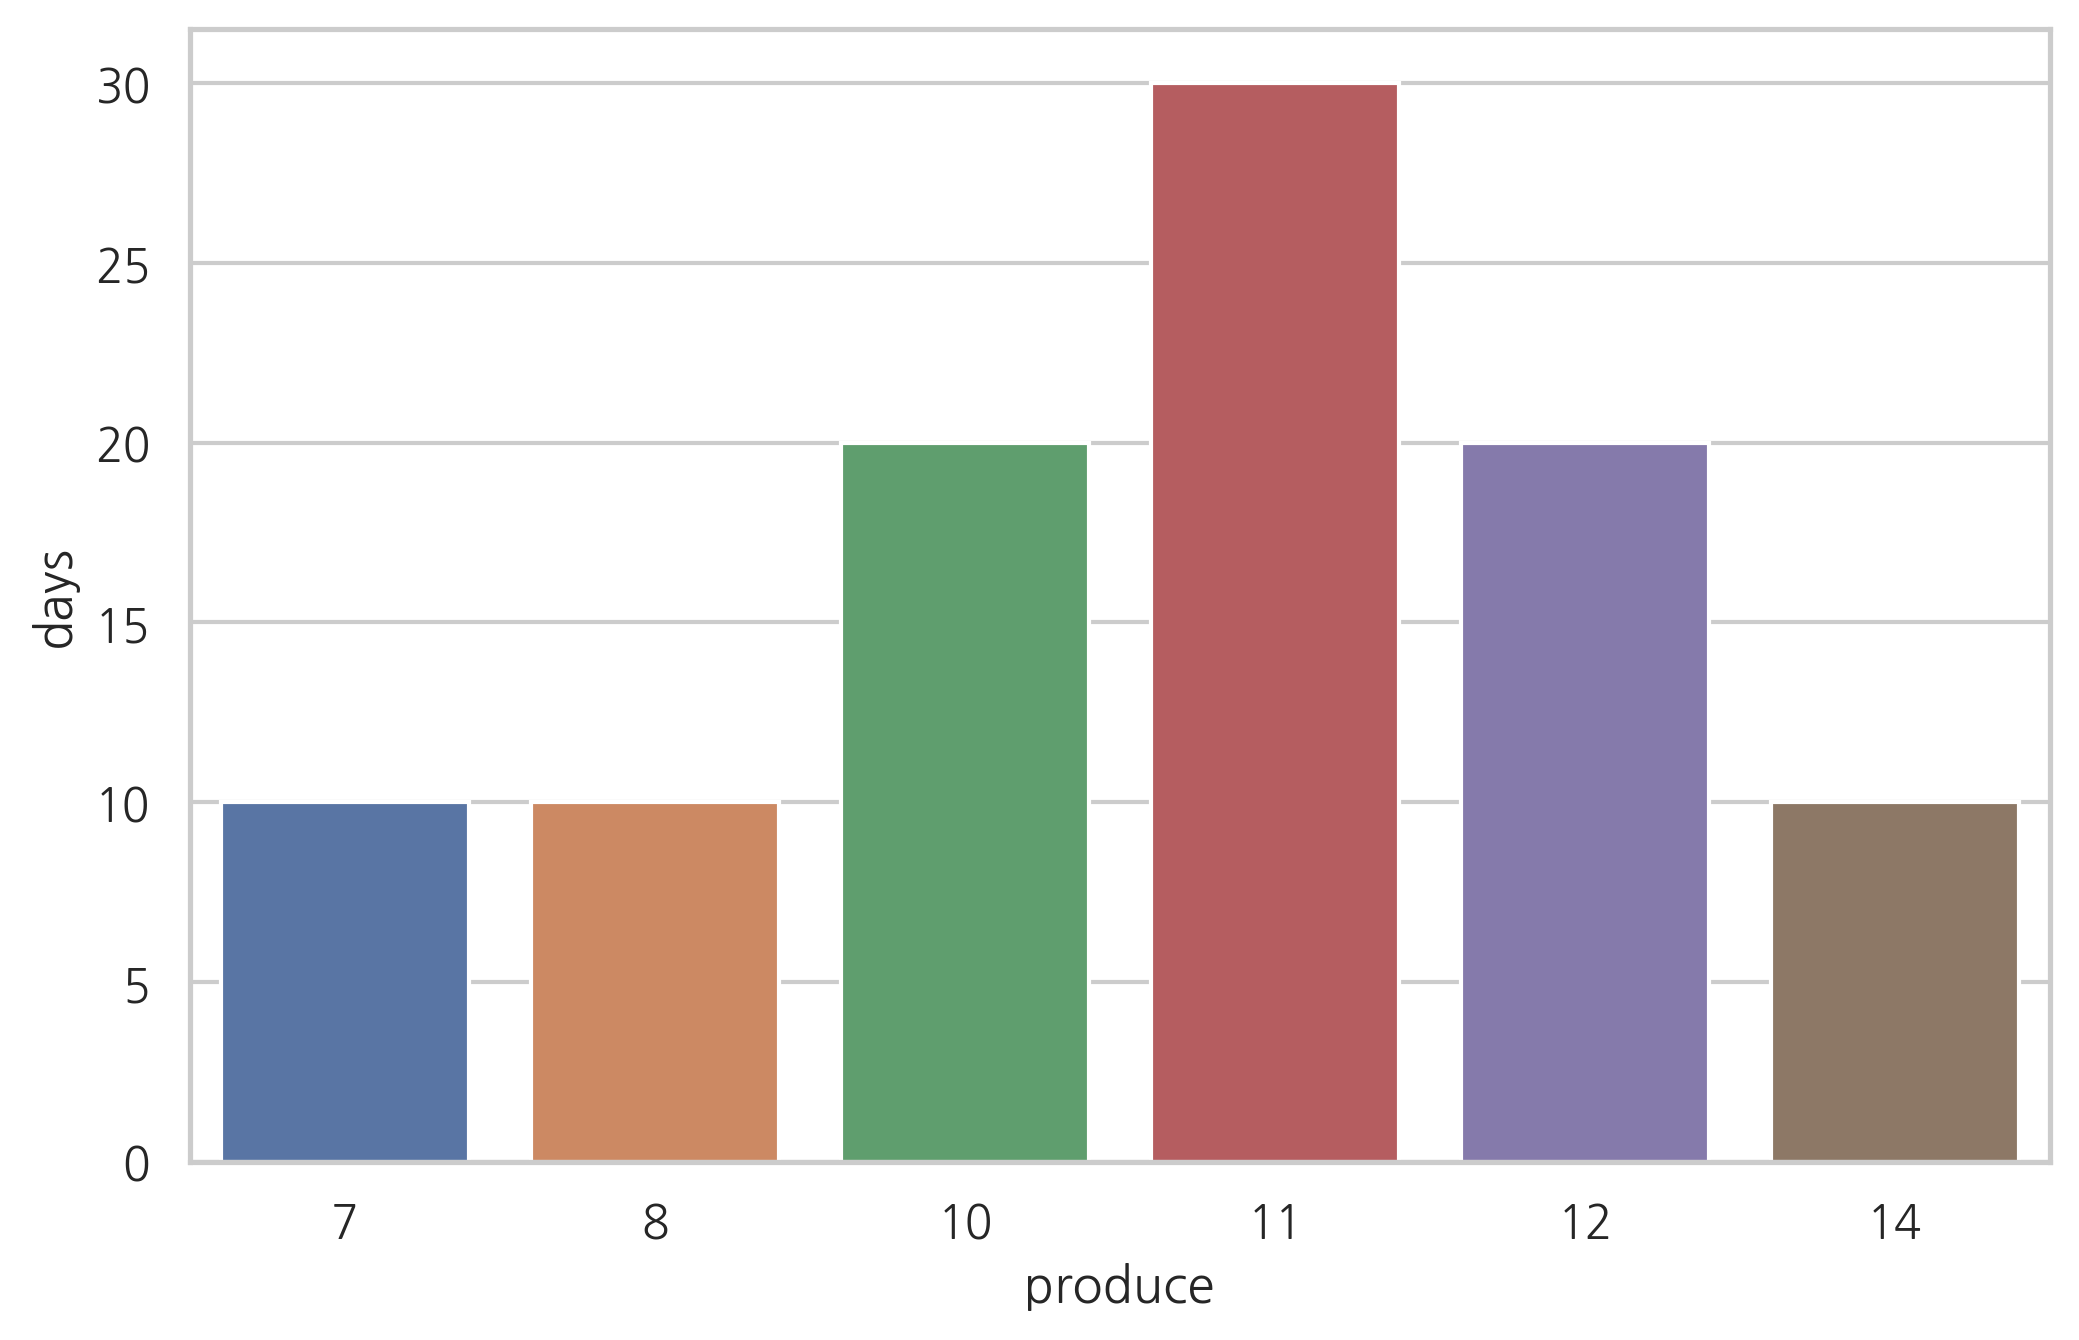

In [9]:
sns.barplot(x="produce", y="days", data=df)
plt.show()

답: 10.6, 3.64, 1.91

## 통계량

* 통계량의 예를 드시오
* order statistics

## 공분산과 상관계수

In [2]:
from sklearn.datasets import load_iris

X = load_iris().data
np.cov(X.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

## 베르누이 분포

$\mu=0.1$인 베르누이 분포에서 10,000개의 표본을 만들었다.

(1) 이 표본의 평균값의 기댓값과 분산은? 

(2) 95%의 확률로 $\mu$값이 있는 구간은? 

## 이항 분포

In [19]:
df["prob"] = df["days"] / df["days"].sum(axis=0)
df["type"] = "sample"

In [25]:
rv = sp.stats.binom(n=16, p=0.67)
df2 = pd.DataFrame({"produce": np.arange(17), "prob": rv.pmf(np.arange(17)), "type":"binomial"})
df2

,produce,prob,type
0,0,1.977985e-08,binomial
1,1,6.425455e-07,binomial
2,2,9.784216e-06,binomial
3,3,9.270297e-05,binomial
4,4,6.116992e-04,binomial
5,5,2.980643e-03,binomial
6,6,1.109462e-02,binomial
7,7,3.217919e-02,binomial
8,8,7.350019e-02,binomial
9,9,1.326468e-01,binomial


In [26]:
df3 = pd.concat([df, df2], axis=0)
df3

,days,pro,prob,produce,type
0,10.0,0.1,1.000000e-01,7,sample
1,10.0,0.1,1.000000e-01,8,sample
2,20.0,0.2,2.000000e-01,10,sample
3,30.0,0.3,3.000000e-01,11,sample
4,20.0,0.2,2.000000e-01,12,sample
5,10.0,0.1,1.000000e-01,14,sample
0,NaN,NaN,1.977985e-08,0,binomial
1,NaN,NaN,6.425455e-07,1,binomial
2,NaN,NaN,9.784216e-06,2,binomial
3,NaN,NaN,9.270297e-05,3,binomial


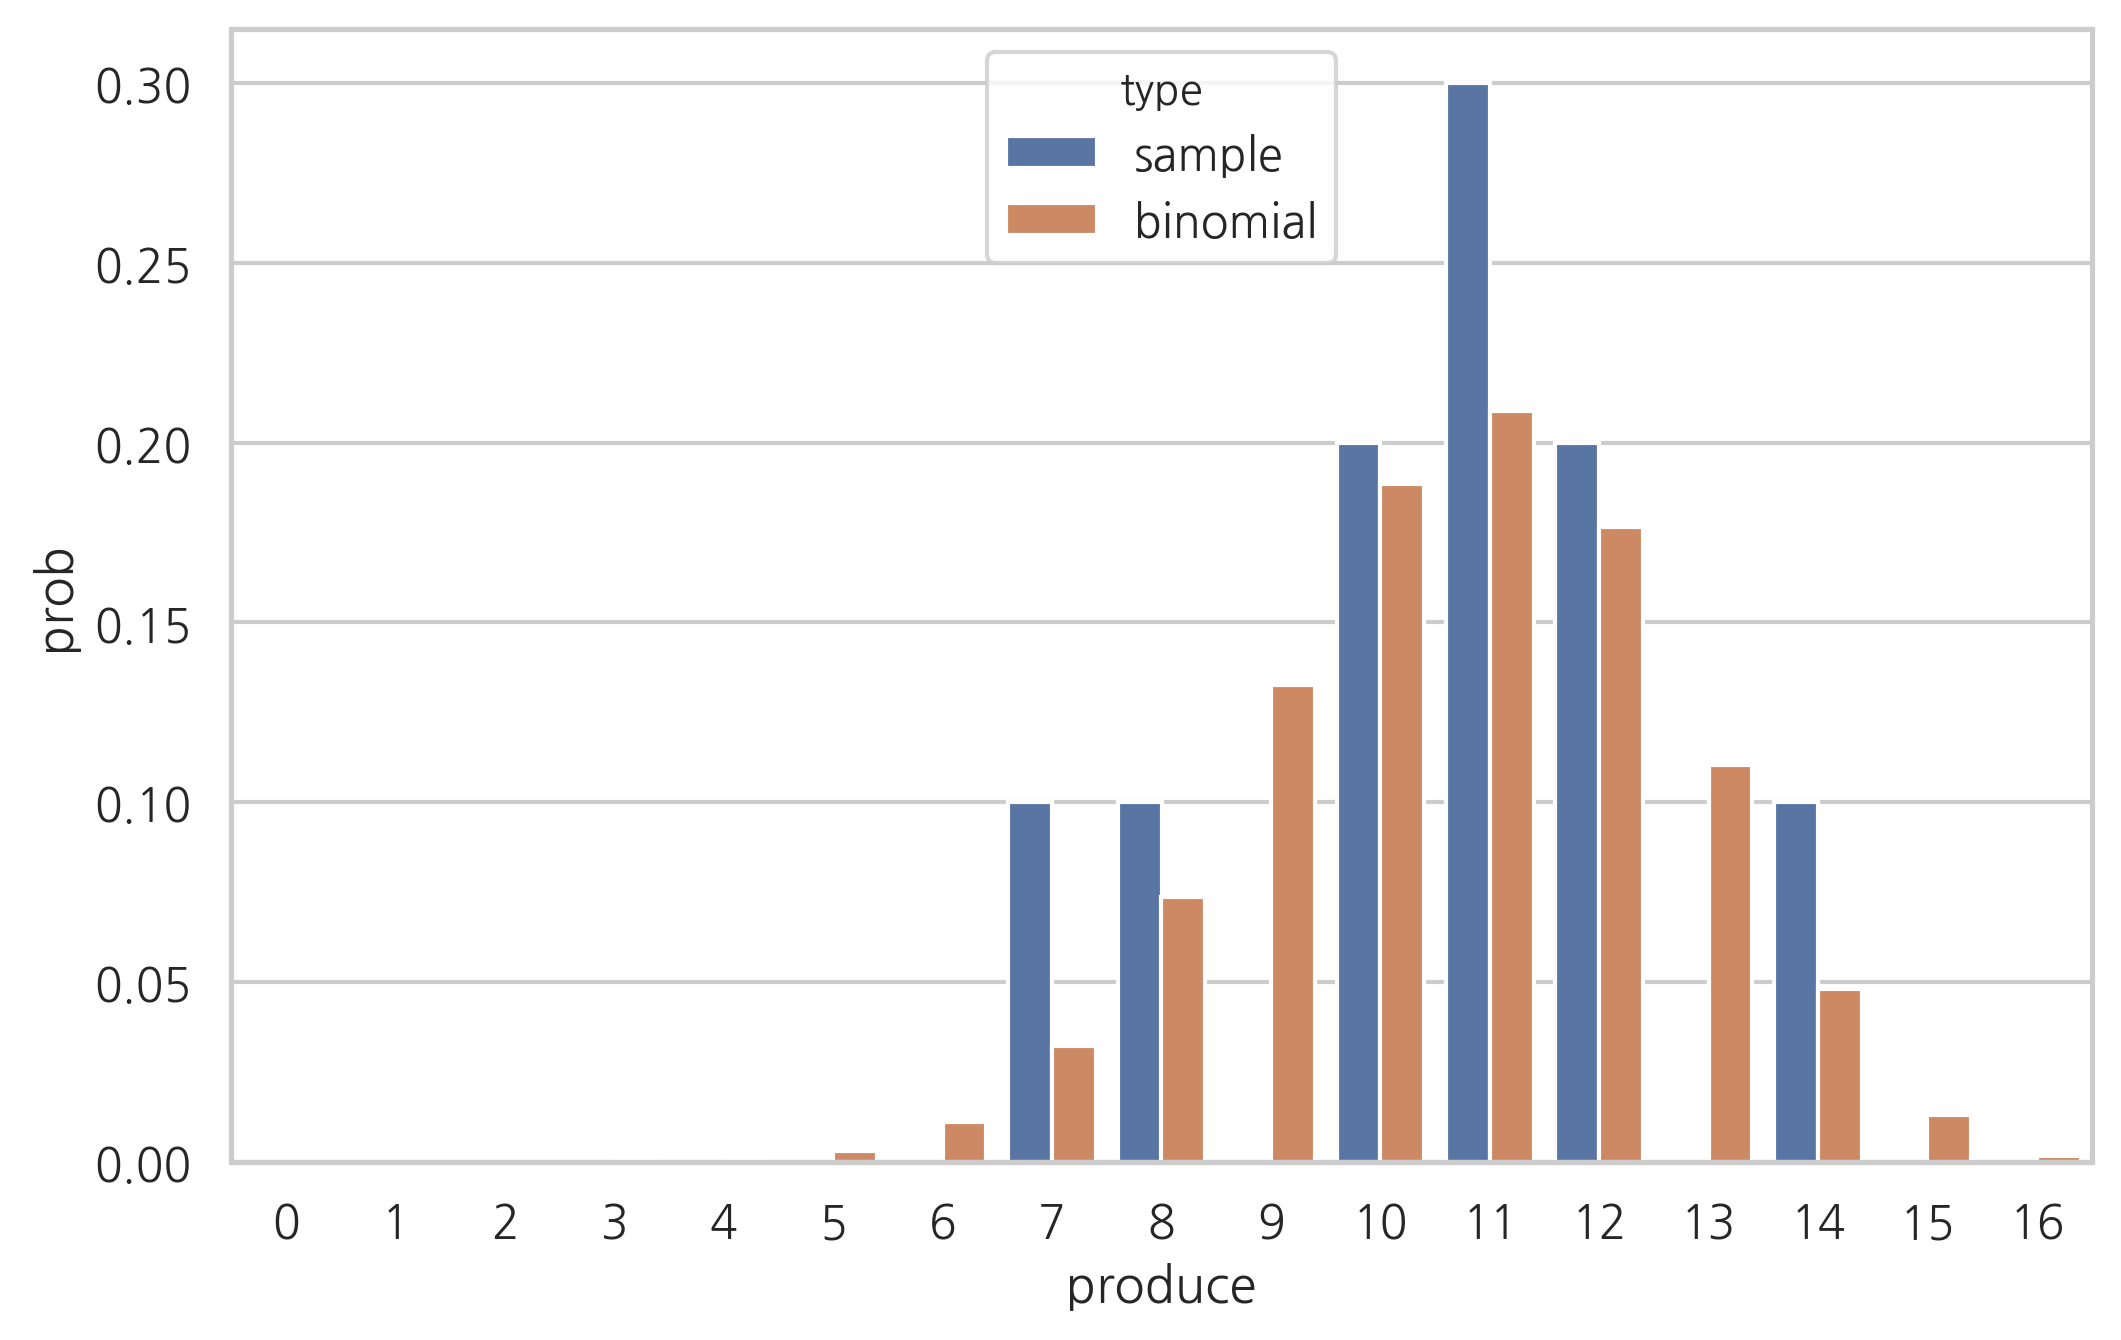

In [28]:
sns.barplot(x="produce", y="prob", hue="type", data=df3)
plt.show()

## 모멘트 방법

In [2]:
df = pd.DataFrame({"produce": [7, 8, 10, 11, 12, 14], 
                   "days": [10, 10, 20, 30, 20, 10]},
                   columns=["produce", "days"])
df

,produce,days
0,7,10
1,8,10
2,10,20
3,11,30
4,12,20
5,14,10


이항분포의 $N, \mu$를 모멘트 방법으로 추정하라.

In [10]:
df["p"] = df.days/df.days.sum()

In [5]:
mean = (df.produce * df.p).sum() 
mean

10.6

In [7]:
np.average(df.produce, weights=df.p)

10.600000000000001

In [9]:
var = ((df.produce - mean)**2 * df.p).sum()
var

3.6400000000000006

In [8]:
np.average((df.produce - mean)**2, weights=df.p)

3.640000000000001

$$ N\mu = 10.6 $$ 

$$ N\mu(1-\mu) = 3.64 $$

$$ {N\mu(1-\mu) \over  N\mu} = 1-\mu = 3.64 / 10.6 $$

$$ \mu = 0.66 $$

$$ N = 10.6 / \mu \approx 16 $$

## MLE

이항분포의 $N, \mu$에 대한 가능도를 그리고 최대가능도추정법으로 $N, \mu$을 추정하라.